# Multicollinearity of Features - Lab

## Introduction

In this lab, you'll identify multicollinearity in the Ames Housing dataset.

## Objectives
You will be able to:
* Create a scatter matrix and correlation matrix
* Assess Intpret the output of a correlation matrix
* Identify if variables are exhibiting collinearity
* Decide how to address the collinearity in the data set

## Correlation matrix for the Ames Housing data

### Import data

Let's reimport the Ames Housing data assign the numeric variables we want to keep to `numeric_vars`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

ames = pd.read_csv('ames.csv')

numeric_vars = ['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea',
                'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
                'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                'ScreenPorch', 'PoolArea']

### Create processed
Create a new dataframe named `ames_preprocessed` that contains only the features in `numeric_vars`.

In [2]:
# create single dataframe called ames_preprocessed
ames_preprocessed = ames.copy()
ames_preprocessed = ames_preprocessed[numeric_vars]
ames_preprocessed.head()

,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
0,65.0,8450,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0
1,80.0,9600,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0
2,68.0,11250,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0
3,60.0,9550,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0
4,84.0,14260,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0


## Scatter matrix
Create the scatter matrix for the Ames Housing data. This takes a few minutes to load!

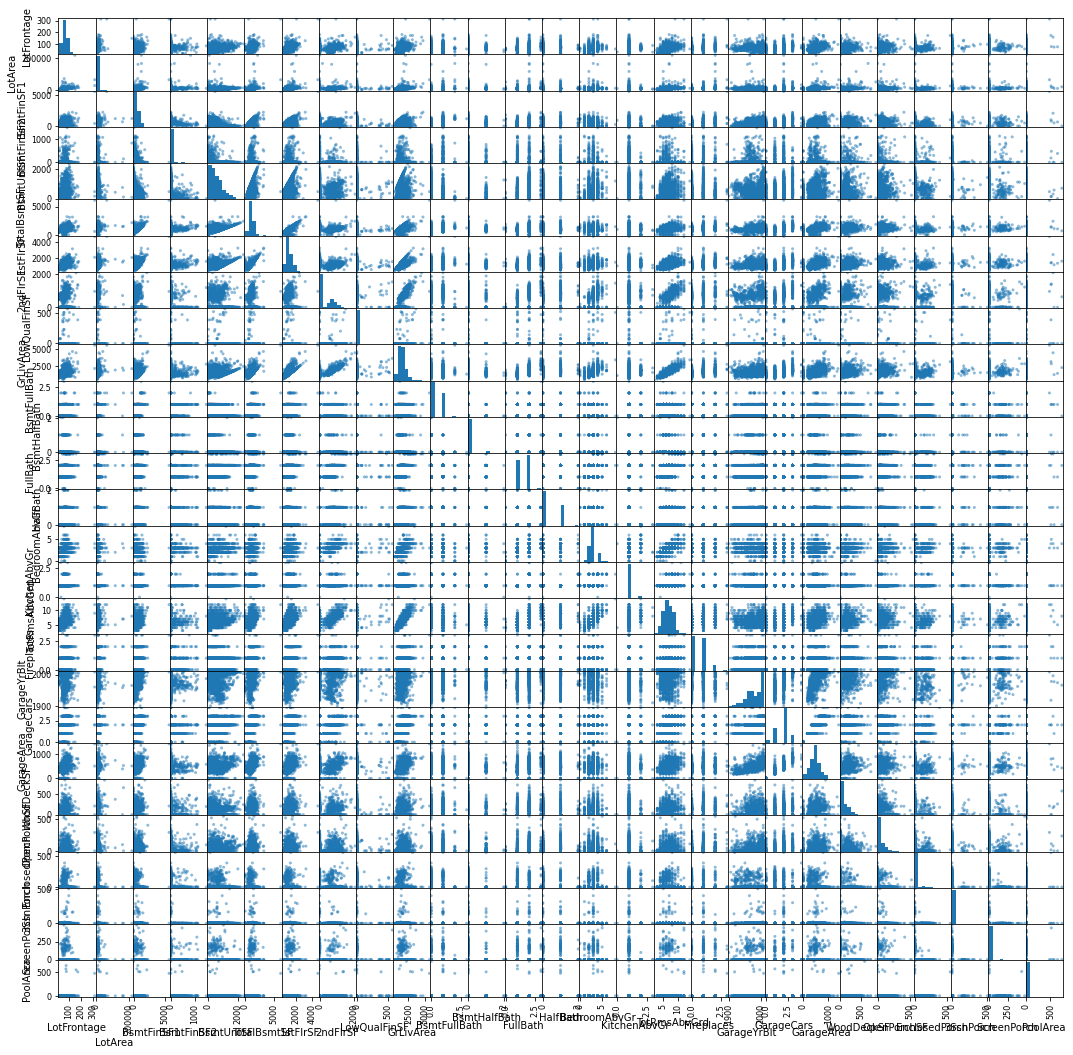

In [4]:
# use pd.plotting.scatter_matrix
sm = pd.plotting.scatter_matrix(ames_preprocessed, figsize=(18,18));

The scatter matrix took a while to load and is hard to read. Run the code below to see if adjusting some of the visualization settings helps. 

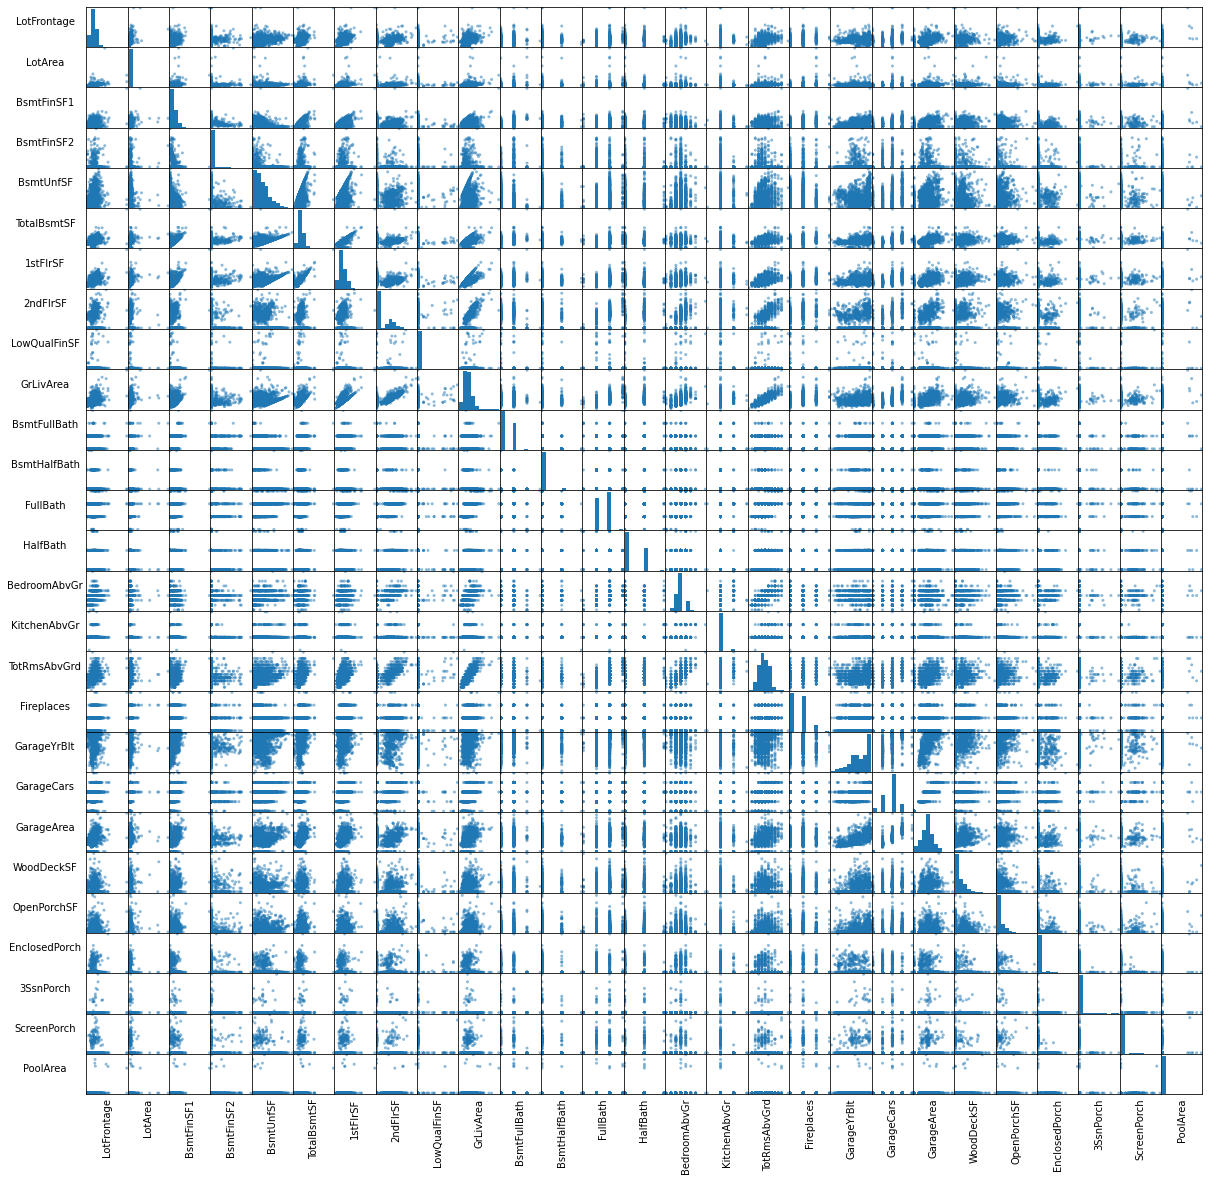

In [5]:
sm = pd.plotting.scatter_matrix(ames_preprocessed, figsize=[20, 20]);

# Rotates the text
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

The enhanced plot demonstrates that with larger datasets, scatter matricies become less useful. Through careful examination of the matrix it's clear that `TotRmsAbvGrd` seems correlated with `GrLivArea`, but how easy to use would this matrix if a dataset has hundreds or thousands of variables? Also visual approach to finding correlation cannot be automated, so a numeric approach is a good next step.

## Correlation matrix

Next, create and look at the correlation matrix: 

In [6]:
ames_preprocessed.corr()

,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
LotFrontage,1.000000,0.426095,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167
LotArea,0.426095,1.000000,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672
BsmtFinSF1,0.233633,0.214103,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491
BsmtFinSF2,0.049900,0.111170,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709
BsmtUnfSF,0.132644,-0.002618,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.190708,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092
TotalBsmtSF,0.392075,0.260833,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.322445,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053
1stFlrSF,0.457181,0.299475,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.233449,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525
2ndFlrSF,0.080177,0.050986,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,0.687501,-0.169494,-0.023855,0.421378,0.609707,0.502901,0.059306,0.616423,0.194561,0.070832,0.183926,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487
LowQualFinSF,0.038469,0.004779,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,0.134683,-0.047143,-0.005842,-0.000710,-0.027080,0.105607,0.007522,0.131185,-0.021272,-0.036363,-0.094480,-0.067601,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157
GrLivArea,0.402797,0.263116,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,0.134683,1.000000,0.034836,-0.018918,0.630012,0.415772,0.521270,0.100063,0.825489,0.461679,0.231197,0.467247,0.468997,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205


Return `True` for positive or negative correlations that are bigger than 0.75 in the correlation matrix: 

In [16]:
def highlight_high_corr(corr, cutoff=0.75):
    '''
    highlight highly correlated variables using set cutoff (default is greater than 0.75)
    '''
    high_corr = corr > cutoff
    return ['background-color: yellow' if v else '' for v in high_corr] 

In [17]:
corr_df = ames_preprocessed.corr()
corr_df.style.apply(highlight_high_corr)

,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
LotFrontage,1.000000,0.426095,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167
LotArea,0.426095,1.000000,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672
BsmtFinSF1,0.233633,0.214103,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491
BsmtFinSF2,0.049900,0.111170,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709
BsmtUnfSF,0.132644,-0.002618,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.190708,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092
TotalBsmtSF,0.392075,0.260833,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.322445,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053
1stFlrSF,0.457181,0.299475,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.233449,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525
2ndFlrSF,0.080177,0.050986,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,0.687501,-0.169494,-0.023855,0.421378,0.609707,0.502901,0.059306,0.616423,0.194561,0.070832,0.183926,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487
LowQualFinSF,0.038469,0.004779,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,0.134683,-0.047143,-0.005842,-0.000710,-0.027080,0.105607,0.007522,0.131185,-0.021272,-0.036363,-0.094480,-0.067601,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157
GrLivArea,0.402797,0.263116,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,0.134683,1.000000,0.034836,-0.018918,0.630012,0.415772,0.521270,0.100063,0.825489,0.461679,0.231197,0.467247,0.468997,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205


In [18]:
(abs(ames_preprocessed.corr()) > 0.75).style.apply(highlight_high_corr)

,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
LotFrontage,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
LotArea,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
BsmtFinSF1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
BsmtFinSF2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
BsmtUnfSF,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
TotalBsmtSF,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1stFlrSF,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2ndFlrSF,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
LowQualFinSF,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
GrLivArea,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


Breakdown of the stack and zip method as seen in multicollinearity lesson.

In [32]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value

df_abs = ames_preprocessed.corr().abs()#.stack().reset_index().sort_values(0, ascending=False)

display(df_abs.head())
df_abs.index

,LotFrontage,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
LotFrontage,1.000000,0.426095,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,0.007234,0.198769,0.053532,0.263170,0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167
LotArea,0.426095,1.000000,0.214103,0.111170,0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,0.017784,0.190015,0.271364,0.024947,0.154871,0.180403,0.171698,0.084774,0.018340,0.020423,0.043160,0.077672
BsmtFinSF1,0.233633,0.214103,1.000000,0.050117,0.495251,0.522396,0.445863,0.137079,0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,0.107355,0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,0.102303,0.026451,0.062021,0.140491
BsmtFinSF2,0.049900,0.111170,0.050117,1.000000,0.209294,0.104810,0.097117,0.099260,0.014807,0.009640,0.158678,0.070948,0.076444,0.032148,0.015728,0.040751,0.035227,0.046921,0.088011,0.038264,0.018227,0.067898,0.003093,0.036543,0.029993,0.088871,0.041709
BsmtUnfSF,0.132644,0.002618,0.495251,0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,0.422900,0.095804,0.288886,0.041118,0.166643,0.030086,0.250647,0.051575,0.190708,0.214175,0.183303,0.005316,0.129005,0.002538,0.020764,0.012579,0.035092


Index(['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea'],
      dtype='object')

In [33]:
# stacks the row:column pairs into a multiindex

df_abs_stack = ames_preprocessed.corr().abs().stack()#.reset_index().sort_values(0, ascending=False)

display(df_abs_stack.head())
df_abs_stack.index

LotFrontage  LotFrontage    1.000000
             LotArea        0.426095
             BsmtFinSF1     0.233633
             BsmtFinSF2     0.049900
             BsmtUnfSF      0.132644
dtype: float64

MultiIndex([('LotFrontage',   'LotFrontage'),
            ('LotFrontage',       'LotArea'),
            ('LotFrontage',    'BsmtFinSF1'),
            ('LotFrontage',    'BsmtFinSF2'),
            ('LotFrontage',     'BsmtUnfSF'),
            ('LotFrontage',   'TotalBsmtSF'),
            ('LotFrontage',      '1stFlrSF'),
            ('LotFrontage',      '2ndFlrSF'),
            ('LotFrontage',  'LowQualFinSF'),
            ('LotFrontage',     'GrLivArea'),
            ...
            (   'PoolArea',    'Fireplaces'),
            (   'PoolArea',   'GarageYrBlt'),
            (   'PoolArea',    'GarageCars'),
            (   'PoolArea',    'GarageArea'),
            (   'PoolArea',    'WoodDeckSF'),
            (   'PoolArea',   'OpenPorchSF'),
            (   'PoolArea', 'EnclosedPorch'),
            (   'PoolArea',     '3SsnPorch'),
            (   'PoolArea',   'ScreenPorch'),
            (   'PoolArea',      'PoolArea')],
           length=729)

In [34]:
# reset the index to set the multiindex to separate columns
# note that 0 is the column automatically generated by the stacking (contains corr coef for the pair of vars)

df_res_idx = ames_preprocessed.corr().abs().stack().reset_index()#.sort_values(0, ascending=False)

display(df_res_idx.head())
df_res_idx.index

,level_0,level_1,0
0,LotFrontage,LotFrontage,1.000000
1,LotFrontage,LotArea,0.426095
2,LotFrontage,BsmtFinSF1,0.233633
3,LotFrontage,BsmtFinSF2,0.049900
4,LotFrontage,BsmtUnfSF,0.132644


RangeIndex(start=0, stop=729, step=1)

In [35]:
# sort values on the column named '0' which was automatically generated by the stacking

df_sort_multiidx = ames_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)

display(df_sort_multiidx.head())
df_sort_multiidx.index

,level_0,level_1,0
0,LotFrontage,LotFrontage,1.0
392,BedroomAbvGr,BedroomAbvGr,1.0
84,BsmtFinSF2,BsmtFinSF2,1.0
112,BsmtUnfSF,BsmtUnfSF,1.0
140,TotalBsmtSF,TotalBsmtSF,1.0


Int64Index([  0, 392,  84, 112, 140, 168, 196, 224, 252, 280,
            ...
            625, 131, 173, 303, 228, 332, 146, 302, 658, 294],
           dtype='int64', length=729)

Now, include `stack` and `zip` to create a more robust solution that will return the variable pairs from the correlation matrix that have correlations over .75, but less than 1. 

In [36]:
df = ames_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default)
#   into a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
df.head()

,level_0,level_1,0,pairs
0,LotFrontage,LotFrontage,1.0,"(LotFrontage, LotFrontage)"
392,BedroomAbvGr,BedroomAbvGr,1.0,"(BedroomAbvGr, BedroomAbvGr)"
84,BsmtFinSF2,BsmtFinSF2,1.0,"(BsmtFinSF2, BsmtFinSF2)"
112,BsmtUnfSF,BsmtUnfSF,1.0,"(BsmtUnfSF, BsmtUnfSF)"
140,TotalBsmtSF,TotalBsmtSF,1.0,"(TotalBsmtSF, TotalBsmtSF)"


In [37]:
# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [39]:
df.head()

,cc
pairs,
"(LotFrontage, LotFrontage)",1.000000
"(GarageArea, GarageCars)",0.882475
"(TotRmsAbvGrd, GrLivArea)",0.825489
"(1stFlrSF, TotalBsmtSF)",0.819530
"(GrLivArea, 2ndFlrSF)",0.687501


Which varibles are highly correlated in the Ames Housing data set?

In [41]:
highly_corr = df.loc[(df['cc'] > 0.75) & (df['cc'] < 1)]
highly_corr

,cc
pairs,
"(GarageArea, GarageCars)",0.882475
"(TotRmsAbvGrd, GrLivArea)",0.825489
"(1stFlrSF, TotalBsmtSF)",0.819530


In [ ]:
""" GarageArea is highly corr with GarageCars (0.88). 

    TotRmsAbvGrd is highly corr with GrLivArea (0.83).
    
    1stFlrSF is highly corr with TotalBsmtSF (0.82)."""

## Make a data decision

Now that you know which variables are correlated with eachother, which would you drop from the dataset?

In [ ]:
"""
Since three different pairs of variables are highly correlated, drop one variable from each pair.

One approach would be to drop Garage Cars, Total Rooms, and Total Basement Square Feet.

Garage Cars: The number of cars that in fit a garage is dpt on the size of the garage. 
             
Total Rooms: There are other variables that count the number of kitchens, bathrooms, bedrooms, etc. 

Total Basement Square Feet: The first floor of a building is usually built upon the foundation,
             which contains the basement. To keep the information that there *is* a basement, 
             you could create a variable "HasBasement", when TotalBsmtSF >0, 
             before deleting the original variable. 
"""


## Address the colinearity

Remove the chosen variables from `ames_preprocessed`.

In [43]:
ames_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   BsmtFinSF1     1460 non-null   int64  
 3   BsmtFinSF2     1460 non-null   int64  
 4   BsmtUnfSF      1460 non-null   int64  
 5   TotalBsmtSF    1460 non-null   int64  
 6   1stFlrSF       1460 non-null   int64  
 7   2ndFlrSF       1460 non-null   int64  
 8   LowQualFinSF   1460 non-null   int64  
 9   GrLivArea      1460 non-null   int64  
 10  BsmtFullBath   1460 non-null   int64  
 11  BsmtHalfBath   1460 non-null   int64  
 12  FullBath       1460 non-null   int64  
 13  HalfBath       1460 non-null   int64  
 14  BedroomAbvGr   1460 non-null   int64  
 15  KitchenAbvGr   1460 non-null   int64  
 16  TotRmsAbvGrd   1460 non-null   int64  
 17  Fireplaces     1460 non-null   int64  
 18  GarageYr

In [44]:
corr_var_to_drop = ['GarageCars', 'TotRmsAbvGrd', 'TotalBsmtSF']
ames_preprocessed.drop(columns=corr_var_to_drop, inplace=True)
ames_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   BsmtFinSF1     1460 non-null   int64  
 3   BsmtFinSF2     1460 non-null   int64  
 4   BsmtUnfSF      1460 non-null   int64  
 5   1stFlrSF       1460 non-null   int64  
 6   2ndFlrSF       1460 non-null   int64  
 7   LowQualFinSF   1460 non-null   int64  
 8   GrLivArea      1460 non-null   int64  
 9   BsmtFullBath   1460 non-null   int64  
 10  BsmtHalfBath   1460 non-null   int64  
 11  FullBath       1460 non-null   int64  
 12  HalfBath       1460 non-null   int64  
 13  BedroomAbvGr   1460 non-null   int64  
 14  KitchenAbvGr   1460 non-null   int64  
 15  Fireplaces     1460 non-null   int64  
 16  GarageYrBlt    1379 non-null   float64
 17  GarageArea     1460 non-null   int64  
 18  WoodDeck

## Summary
Good job! You got some hands-on practice creating and interpreting a scatter matrix and correlation matrix to identify if variables are collinear in the Ames Housing data set. You also edited the Ames Housing data set so highly correlated variables are removed.